In [1]:
# Install required packages
!pip install osmnx geopandas

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString
import random


In [3]:
# Configure OSMnx settings
ox.settings.use_cache = True
ox.settings.log_console = True

In [4]:
# Downloading Bangalore's Road Network
# Define the place name for Bangalore
place_name = "Bangalore, India"

In [5]:
# Download the driving network for Bangalore
G = ox.graph_from_place(place_name, network_type='drive')

In [6]:
# Check if the graph is already simplified
if "simplified" not in G.graph or not G.graph["simplified"]:
    # Simplify the graph
    G = ox.simplify_graph(G)

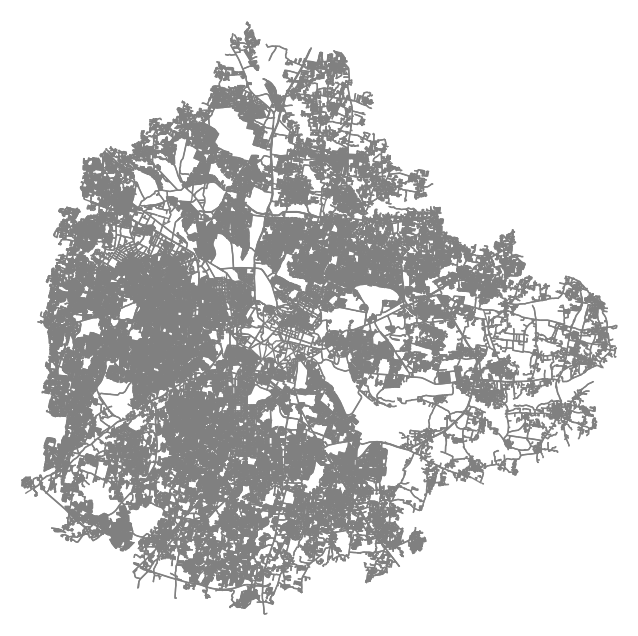

In [7]:
# Plot the graph
fig, ax = ox.plot_graph(G, node_size=0, edge_color='gray', bgcolor='white')


In [8]:
# Performing Routing
# A. Define Origin and Destination Points
# Let's choose two locations within Bangalore
origin_address = "Kempegowda International Airport, Bangalore, India"
destination_address = "Bangalore Palace, Bangalore, India"

In [9]:
# Geocode the addresses to get latitude and longitude
origin_point = ox.geocode(origin_address)
destination_point = ox.geocode(destination_address)


print(f"Origin Point: {origin_point}")
print(f"Destination Point: {destination_point}")

Origin Point: (13.1976048, 77.7074856433438)
Destination Point: (12.9985954, 77.59200860232801)


In [10]:
# B. Find the Nearest Nodes in the Graph
origin_node = ox.distance.nearest_nodes(G, origin_point[1], origin_point[0])
destination_node = ox.distance.nearest_nodes(G, destination_point[1], destination_point[0])


In [11]:
# C. Compute the Shortest Path
# We'll use Dijkstra's algorithm to find the shortest path based on travel distance.
route = nx.shortest_path(G, origin_node, destination_node, weight='length')


In [12]:
# Compute the route length in meters
route_length = nx.shortest_path_length(G, origin_node, destination_node, weight='length')
print(f"Route length: {route_length / 1000:.2f} km")


Route length: 16.92 km


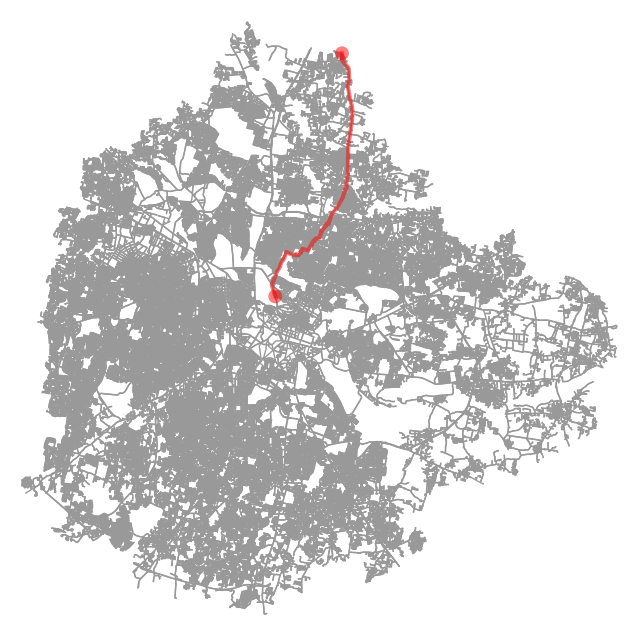

In [13]:
# D. Visualize the Route
# Plot the route on the map
fig, ax = ox.plot_graph_route(G, route, node_size=0, bgcolor='white', route_color='red', route_linewidth=3, show=False, close=False)
plt.show()


In [14]:
# 3. Integrating Real-Time Traffic Data
# Simulate Traffic Conditions
import random

In [15]:
# Add a 'traffic_delay' attribute to each edge
for u, v, k, data in G.edges(keys=True, data=True):
    # Simulate traffic delay as a percentage increase in travel time
    data['traffic_delay'] = random.uniform(1.0, 1.5)  # Random delay between 0% to 50%

    # Adjust the edge weight
    data['adjusted_weight'] = data['length'] * data['traffic_delay']


Adjusted route length with traffic: 21.09 km


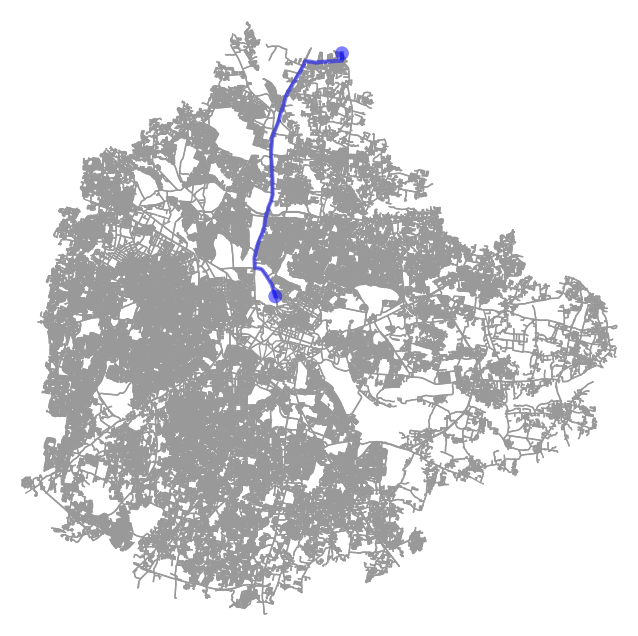

In [16]:
# Compute the Shortest Path Considering Traffic
route_with_traffic = nx.shortest_path(G, origin_node, destination_node, weight='adjusted_weight')

# Compute the adjusted route length
route_length_with_traffic = nx.shortest_path_length(G, origin_node, destination_node, weight='adjusted_weight')
print(f"Adjusted route length with traffic: {route_length_with_traffic / 1000:.2f} km")

# Visualize the Adjusted Route
fig, ax = ox.plot_graph_route(G, route_with_traffic, node_size=0, bgcolor='white', route_color='blue', route_linewidth=3, show=False, close=False)
plt.show()

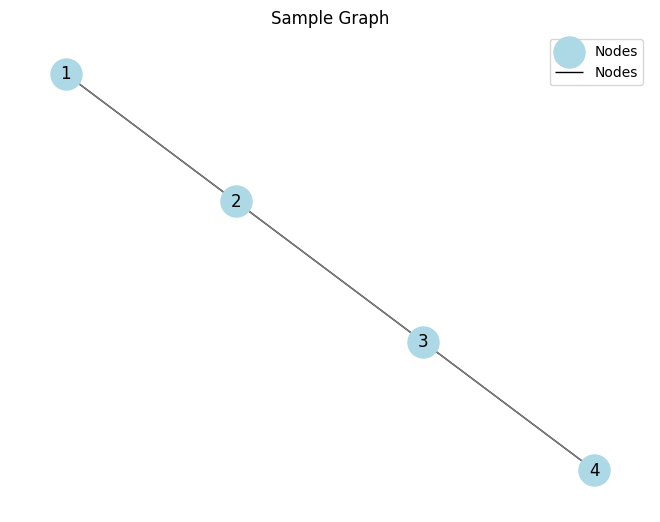

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# Sample graph creation
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4)])

# Position the nodes using a spring layout
pos = nx.spring_layout(G)

# Draw the nodes with a label
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, label='Nodes')
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Add legend
plt.legend()  # This will now have artists with labels to show

# Show the plot
plt.title("Sample Graph")
plt.show()


In [17]:
# Install folium for map visualization
!pip install folium


In [20]:
import folium

In [21]:
# Coordinates for Bangalore
bangalore_coords = [12.9716, 77.5946]  # Latitude and Longitude for Bangalore

# Create a folium map centered around Bangalore
map_bangalore = folium.Map(location=bangalore_coords, zoom_start=12)


In [22]:
# Add a marker for Kempegowda International Airport
folium.Marker(
    location=[13.1986, 77.7065],  # Coordinates for the airport
    popup="Kempegowda International Airport",
    icon=folium.Icon(color='blue')
).add_to(map_bangalore)

# Add a marker for Bangalore Palace
folium.Marker(
    location=[12.9989, 77.5907],  # Coordinates for Bangalore Palace
    popup="Bangalore Palace",
    icon=folium.Icon(color='green')
).add_to(map_bangalore)


In [23]:
# Display the map
map_bangalore



In [8]:
import osmnx as ox
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [9]:
# Step 1: Configure OSMnx settings
ox.settings.use_cache = True
ox.settings.log_console = True

In [10]:
# Step 2: Download the road network for a specific area
place_name = "Bangalore, India"
G = ox.graph_from_place(place_name, network_type='drive')


In [11]:
# Step 3: Get the origin and destination locations
origin = Point(77.5946, 12.9716)  # Example coordinates (Bangalore)
destination = Point(77.6291, 12.9614)  # Another point in Bangalore

In [12]:
# Step 4: Get the nearest nodes for origin and destination
origin_node = ox.distance.nearest_nodes(G, X=origin.x, Y=origin.y)
destination_node = ox.distance.nearest_nodes(G, X=destination.x, Y=destination.y)

In [13]:
# Step 5: Load traffic data (example data for demonstration)
# You would replace this with actual traffic delay data
traffic_data = pd.DataFrame({
    'node': [origin_node, destination_node],
    'traffic_delay': [5, 10]  # Example traffic delays in seconds
})
# Step 5: Load traffic data (example data for demonstration)
# You would replace this with actual traffic delay data
traffic_data = pd.DataFrame({
    'node': [origin_node, destination_node],
    'traffic_delay': [5, 10]  # Example traffic delays in seconds
})


In [14]:
# Step 6: Calculate edge lengths and adjust weights for traffic delays
for u, v, key, data in G.edges(keys=True, data=True):
    if 'length' in data:
        length = data['length']
        delay = traffic_data.loc[traffic_data['node'] == v, 'traffic_delay'].values[0] if v in traffic_data['node'].values else 0
        data['adjusted_weight'] = length + (delay * 10)  # Adjusting weight based on delay

In [15]:
# Step 7: Compute the shortest path considering traffic
route_with_traffic = nx.shortest_path(G, origin_node, destination_node, weight='adjusted_weight')
route_length_with_traffic = nx.shortest_path_length(G, origin_node, destination_node, weight='adjusted_weight')
print(f"Adjusted route length with traffic: {route_length_with_traffic / 1000:.2f} km")


Adjusted route length with traffic: 4.91 km


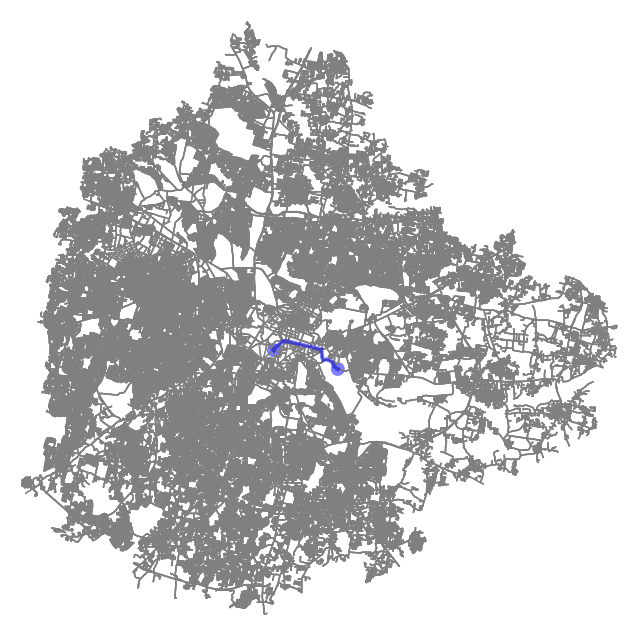

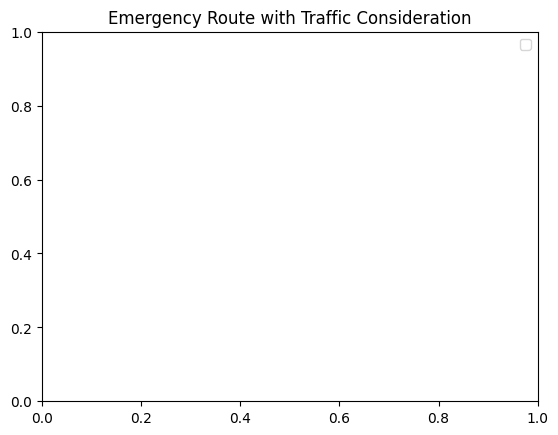

In [16]:
# Step 8: Visualize the route on the map with zooming and place names
fig, ax = ox.plot_graph_route(G, route_with_traffic, node_size=0, bgcolor='white',
                               route_color='blue', route_linewidth=3, show=False, close=False)

# Add the origin and destination markers
ox.plot_graph(G, ax=ax, node_size=0, edge_color='gray')
ax.scatter(origin.x, origin.y, color='green', label='Origin', zorder=5)
ax.scatter(destination.x, destination.y, color='red', label='Destination', zorder=5)
ax.text(origin.x, origin.y, 'Origin', fontsize=12, ha='right', color='green')
ax.text(destination.x, destination.y, 'Destination', fontsize=12, ha='right', color='red')

# Set limits for zooming
ax.set_xlim(origin.x - 0.01, destination.x + 0.01)
ax.set_ylim(destination.y - 0.01, origin.y + 0.01)

# Show legend and plot
plt.legend()
plt.title("Emergency Route with Traffic Consideration")
plt.show()